# Atividade 2 - Meteorologia

Alunas: Ana Julia Pietroski e Bárbara Girardi

Análise das condições meteorológicas para realizar o estudo de dispersão de poluentes atmosféricos da Klabin S.A., utilizando o dado da estação meteorológica e de sondagem mais próximo, que neste caso é o aeroporto de Florianópolis.

## Etapa 1: Análise da condição meteorológica de superfície

Avaliação das condições meteorológicas no ano de 2023 e figuras da série temporal bruta e com médias, mínimas e máximas mensais com o pacote https://matplotlib.org/stable/gallery/lines_bars_and_markers/fill_between_demo.html para desenhar a sombra. Analisaremos os dados de metar (estação meteorológica em aeroportos). Os dados serão coletados na plataforma https://hoinaski.prof.ufsc.br/BRAIN/getMETAR para o período de 01/01/2023 a 01/01/2024.

Serão analisadas as seguintes condições meteorológicas: temperatura, umidade, pressão, cobertura de nuvens, velocidade e direção do vento.

Os dados estarão na pasta inputs/meteoSuperficie com a nomenclatura metar.csv

In [24]:
import os
rootPath = os.getcwd()
print(rootPath) #mostra a pasta/diretório que estou no momento

metSuperficiePath = rootPath + '\\inputs\\meteoSuperficie'
print(metSuperficiePath) 

#Listando os arquivos dentro do diretório
files = os.listdir(metSuperficiePath)
print(files)

C:\Users\Acer\Desktop\ENS5173_Barbara\ENS5173_Barbara
C:\Users\Acer\Desktop\ENS5173_Barbara\ENS5173_Barbara\inputs\meteoSuperficie
['metar_2023.csv']


In [25]:
import pandas as pd

metSuperficie=[]
for file in files:
    metSuperficie.append(pd.read_csv(metSuperficiePath+'\\'+file))

metSuperficie = pd.concat(metSuperficie)

print(metSuperficie)

      day  month  year  hour  ct     wd        ws      hc  ccp  cco  \
0       1      1  2023     0 NaN  360.0  5.144440  2133.6  3.0  3.0   
1       1      1  2023     1 NaN  360.0  4.115552  3048.0  6.0  6.0   
2       1      1  2023     2 NaN  360.0  4.115552  3048.0  6.0  6.0   
3       1      1  2023     3 NaN  350.0  4.629996  3048.0  6.0  6.0   
4       1      1  2023     4 NaN  340.0  5.144440  1219.2  6.0  6.0   
...   ...    ...   ...   ...  ..    ...       ...     ...  ...  ...   
8753   31     12  2023    19 NaN  110.0  4.629996  2438.4  6.0  6.0   
8754   31     12  2023    20 NaN  130.0  3.601108  2438.4  6.0  6.0   
8755   31     12  2023    21 NaN  120.0  2.057776  2438.4  6.0  6.0   
8756   31     12  2023    22 NaN  190.0  2.057776  2438.4  6.0  6.0   
8757   31     12  2023    23 NaN  140.0  2.057776  2438.4  6.0  6.0   

                p  temp  dpTemp  vis   pw   relh  
0     1009.658428  25.0    22.0  NaN  0.0  83.44  
1     1009.654835  25.0    22.0  NaN  0.0  83

In [26]:
#Criar uma coluna com Datetime dos dados

metSuperficie['datetime'] = pd.to_datetime(metSuperficie[['year','month','day','hour']])
print(metSuperficie['datetime'])

#Definindo a coluna de datetime como índice da matriz
metSuperficie.set_index(metSuperficie['datetime'])

0      2023-01-01 00:00:00
1      2023-01-01 01:00:00
2      2023-01-01 02:00:00
3      2023-01-01 03:00:00
4      2023-01-01 04:00:00
               ...        
8753   2023-12-31 19:00:00
8754   2023-12-31 20:00:00
8755   2023-12-31 21:00:00
8756   2023-12-31 22:00:00
8757   2023-12-31 23:00:00
Name: datetime, Length: 8758, dtype: datetime64[ns]


,day,month,year,hour,ct,wd,ws,hc,ccp,cco,p,temp,dpTemp,vis,pw,relh,datetime
datetime,,,,,,,,,,,,,,,,,
2023-01-01 00:00:00,1,1,2023,0,NaN,360.0,5.144440,2133.6,3.0,3.0,1009.658428,25.0,22.0,NaN,0.0,83.44,2023-01-01 00:00:00
2023-01-01 01:00:00,1,1,2023,1,NaN,360.0,4.115552,3048.0,6.0,6.0,1009.654835,25.0,22.0,NaN,0.0,83.44,2023-01-01 01:00:00
2023-01-01 02:00:00,1,1,2023,2,NaN,360.0,4.115552,3048.0,6.0,6.0,1009.654835,25.0,22.0,NaN,0.0,83.44,2023-01-01 02:00:00
2023-01-01 03:00:00,1,1,2023,3,NaN,350.0,4.629996,3048.0,6.0,6.0,1009.654835,25.0,22.0,NaN,0.0,83.44,2023-01-01 03:00:00
2023-01-01 04:00:00,1,1,2023,4,NaN,340.0,5.144440,1219.2,6.0,6.0,1009.658428,25.0,22.0,NaN,0.0,83.44,2023-01-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-31 19:00:00,31,12,2023,19,NaN,110.0,4.629996,2438.4,6.0,6.0,1009.651241,25.0,18.0,NaN,0.0,65.12,2023-12-31 19:00:00
2023-12-31 20:00:00,31,12,2023,20,NaN,130.0,3.601108,2438.4,6.0,6.0,1009.651241,24.0,18.0,NaN,0.0,69.14,2023-12-31 20:00:00
2023-12-31 21:00:00,31,12,2023,21,NaN,120.0,2.057776,2438.4,6.0,6.0,1009.654835,24.0,18.0,NaN,0.0,69.14,2023-12-31 21:00:00


#### - Figura para representação da série temporal bruta e remoção dos dados discrepantes do tipo boxplot e com médias mensais

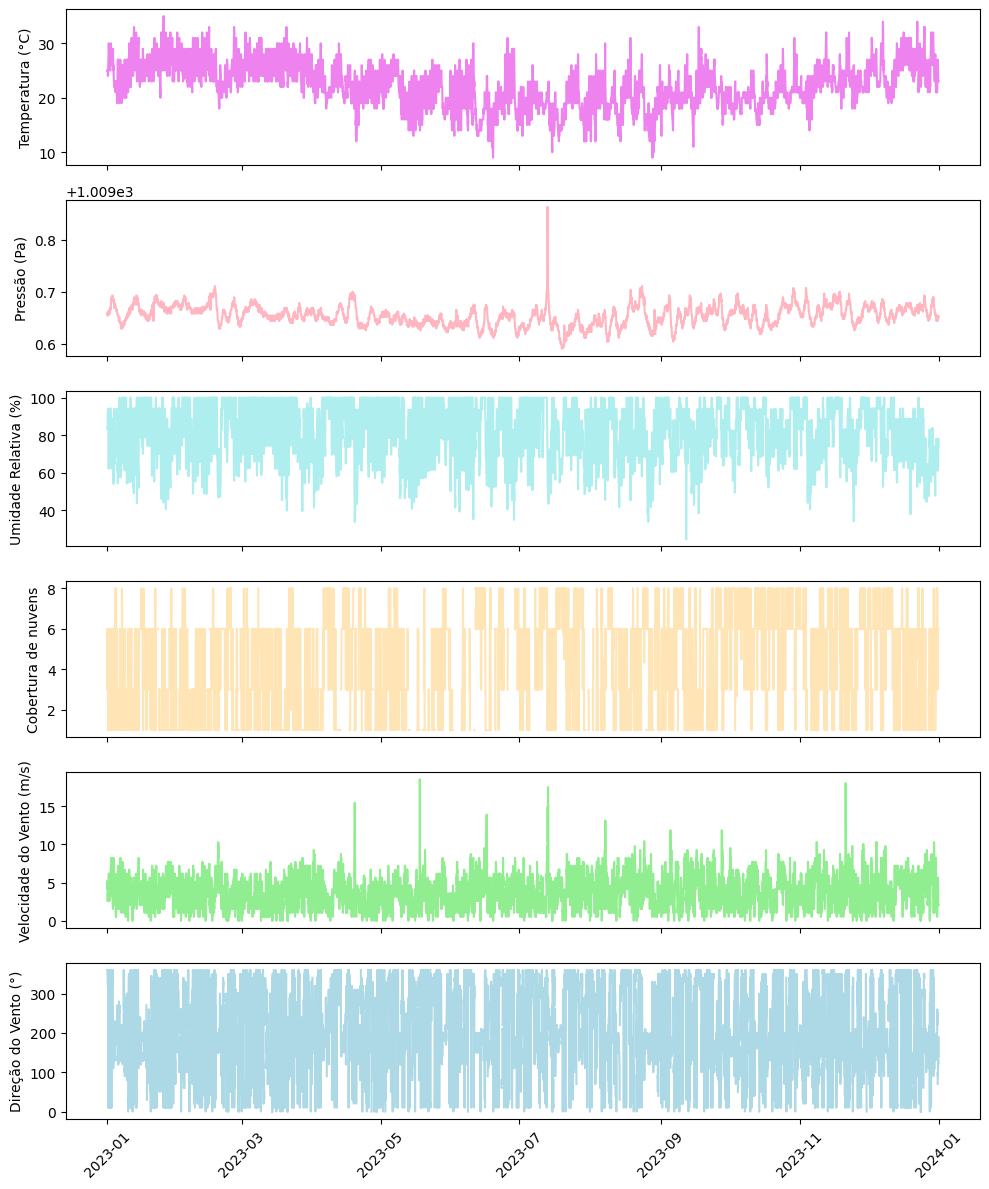

In [27]:
import matplotlib.pyplot as plt

# Supondo que metSuperficie já esteja definido e contém as colunas 'datetime', 'temp', 'p', 'relh', 'cco', 'ws', 'wd'
fig, ax = plt.subplots(6, sharex=True, figsize=(10, 12))

ax[0].plot(metSuperficie['datetime'], metSuperficie['temp'], color='violet')
ax[0].set_ylabel('Temperatura (°C)')

ax[1].plot(metSuperficie['datetime'], metSuperficie['p'], color='lightpink')
ax[1].set_ylabel('Pressão (Pa)')

ax[2].plot(metSuperficie['datetime'], metSuperficie['relh'], color='paleturquoise')
ax[2].set_ylabel('Umidade Relativa (%)')

ax[3].plot(metSuperficie['datetime'], metSuperficie['cco'], color='moccasin')
ax[3].set_ylabel('Cobertura de nuvens')

ax[4].plot(metSuperficie['datetime'], metSuperficie['ws'], color='lightgreen')
ax[4].set_ylabel('Velocidade do Vento (m/s)')

ax[5].plot(metSuperficie['datetime'], metSuperficie['wd'], color='lightblue')
ax[5].set_ylabel('Direção do Vento (°)')

ax[5].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

import os
rootFolder = os.getcwd()
figFolder = rootFolder.replace('\\','/')+'/figures/'
fig.savefig(figFolder+'Figure1.png') 

O percentil 99 da temperatura é: 31.0
O percentil 99 da pressão é: 1009.6967607391396
O percentil 99 do umidade relativa é: 100.0
O percentil 99 da cco é: 8.0
O percentil 99 do ws é: 8.745548
O percentil 99 do wd é: 360.0


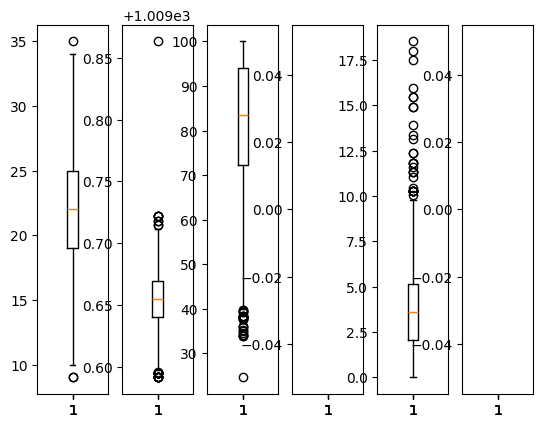

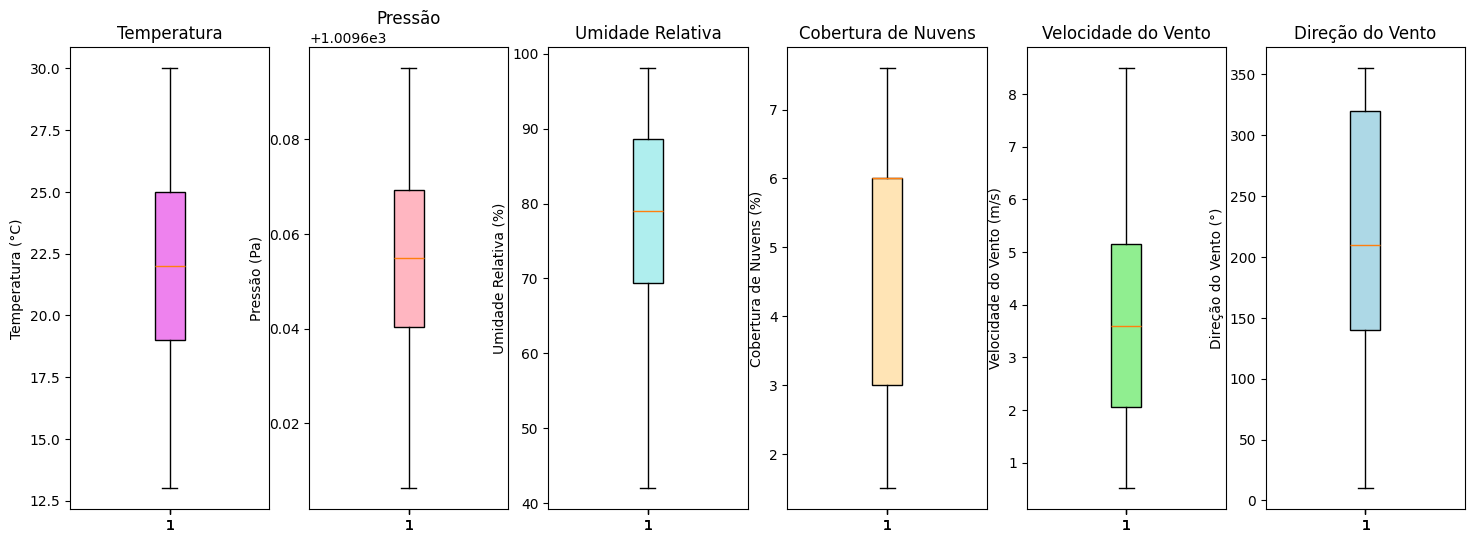

In [28]:
fig,ax = plt.subplots(1,6,sharex=True)
ax[0].boxplot(metSuperficie['temp'])
ax[1].boxplot(metSuperficie['p'])
ax[2].boxplot(metSuperficie['relh'])
ax[3].boxplot(metSuperficie['cco'])
ax[4].boxplot(metSuperficie['ws'])
ax[5].boxplot(metSuperficie['wd'])

import numpy as np
temp99 = np.percentile(metSuperficie['temp'],99)
print('O percentil 99 da temperatura é: '+str(temp99))
p99 = np.percentile(metSuperficie['p'],99)
print('O percentil 99 da pressão é: '+str(p99))
relh99 = relh9 = np.percentile(metSuperficie['relh'],99)
print('O percentil 99 do umidade relativa é: '+str(relh99))
cco99 = np.nanpercentile(metSuperficie['cco'],99)
print('O percentil 99 da cco é: '+str(cco99))
ws99 = np.percentile(metSuperficie['ws'],99)
print('O percentil 99 do ws é: '+str(ws99))
wd99 =  np.nanpercentile(metSuperficie['wd'],99)
print('O percentil 99 do wd é: '+str(wd99))

# Definindo cores para cada boxplot
box_colors = ['violet', 'lightpink', 'paleturquoise', 'moccasin', 'lightgreen', 'lightblue']

fig, ax = plt.subplots(1, 6, sharex=True, figsize=(18, 6))

boxes = [
    ax[0].boxplot(metSuperficie['temp'][(metSuperficie['temp'] < temp99) & 
                                        (metSuperficie['temp'] > np.percentile(metSuperficie['temp'], 0.5))],
                  patch_artist=True, boxprops=dict(facecolor=box_colors[0])),
    ax[1].boxplot(metSuperficie['p'][(metSuperficie['p'] < p99) & 
                                     (metSuperficie['p'] > np.percentile(metSuperficie['p'], 0.5))],
                  patch_artist=True, boxprops=dict(facecolor=box_colors[1])),
    ax[2].boxplot(metSuperficie['relh'][(metSuperficie['relh'] < relh99) & 
                                        (metSuperficie['relh'] > np.percentile(metSuperficie['relh'], 0.5))],
                  patch_artist=True, boxprops=dict(facecolor=box_colors[2])),
    ax[3].boxplot(metSuperficie['cco'][(metSuperficie['cco'] < cco99) &
                                       (metSuperficie['cco'] > np.nanpercentile(metSuperficie['cco'], 0.5))],
                  patch_artist=True, boxprops=dict(facecolor=box_colors[3])),
    ax[4].boxplot(metSuperficie['ws'][(metSuperficie['ws'] < ws99) &
                                      (metSuperficie['ws'] > np.percentile(metSuperficie['ws'], 0.5))],
                  patch_artist=True, boxprops=dict(facecolor=box_colors[4])),
    ax[5].boxplot(metSuperficie['wd'][(metSuperficie['wd'] < wd99) &
                                      (metSuperficie['wd'] > np.nanpercentile(metSuperficie['wd'], 0.5))],
                  patch_artist=True, boxprops=dict(facecolor=box_colors[5]))
]

# Ajustando os rótulos dos eixos
ax[0].set_ylabel('Temperatura (°C)')
ax[1].set_ylabel('Pressão (Pa)')
ax[2].set_ylabel('Umidade Relativa (%)')
ax[3].set_ylabel('Cobertura de Nuvens (%)')
ax[4].set_ylabel('Velocidade do Vento (m/s)')
ax[5].set_ylabel('Direção do Vento (°)')

# Adicionando títulos para cada subplot
ax[0].set_title('Temperatura')
ax[1].set_title('Pressão')
ax[2].set_title('Umidade Relativa')
ax[3].set_title('Cobertura de Nuvens')
ax[4].set_title('Velocidade do Vento')
ax[5].set_title('Direção do Vento')

rootFolder = os.getcwd()
figFolder = rootFolder.replace('\\','/')+'/figures/'
fig.savefig(figFolder+'Figure2.png') 

Dessa forma, temos as condições meteorológicas do ano de 2023 em forma de figuras de série temporal bruta no boxplot acima e a série sem os dados discrepantes nos boxplots de baixo.

#### - Gráfico de médias, máximas e mínimas mensais para as condições meteorológicas de temperatura, pressão, umidade relativa, cobertura de nuvens, velocidade e direção do vento.

      day  month  year  hour  ct     wd        ws      hc  ccp  cco  \
0       1      1  2023     0 NaN  360.0  5.144440  2133.6  3.0  3.0   
1       1      1  2023     1 NaN  360.0  4.115552  3048.0  6.0  6.0   
2       1      1  2023     2 NaN  360.0  4.115552  3048.0  6.0  6.0   
3       1      1  2023     3 NaN  350.0  4.629996  3048.0  6.0  6.0   
4       1      1  2023     4 NaN  340.0  5.144440  1219.2  6.0  6.0   
...   ...    ...   ...   ...  ..    ...       ...     ...  ...  ...   
8753   31     12  2023    19 NaN  110.0  4.629996  2438.4  6.0  6.0   
8754   31     12  2023    20 NaN  130.0  3.601108  2438.4  6.0  6.0   
8755   31     12  2023    21 NaN  120.0  2.057776  2438.4  6.0  6.0   
8756   31     12  2023    22 NaN  190.0  2.057776  2438.4  6.0  6.0   
8757   31     12  2023    23 NaN  140.0  2.057776  2438.4  6.0  6.0   

                p  temp  dpTemp  vis   pw   relh            datetime  
0     1009.658428  25.0    22.0  NaN  0.0  83.44 2023-01-01 00:00:00  
1    

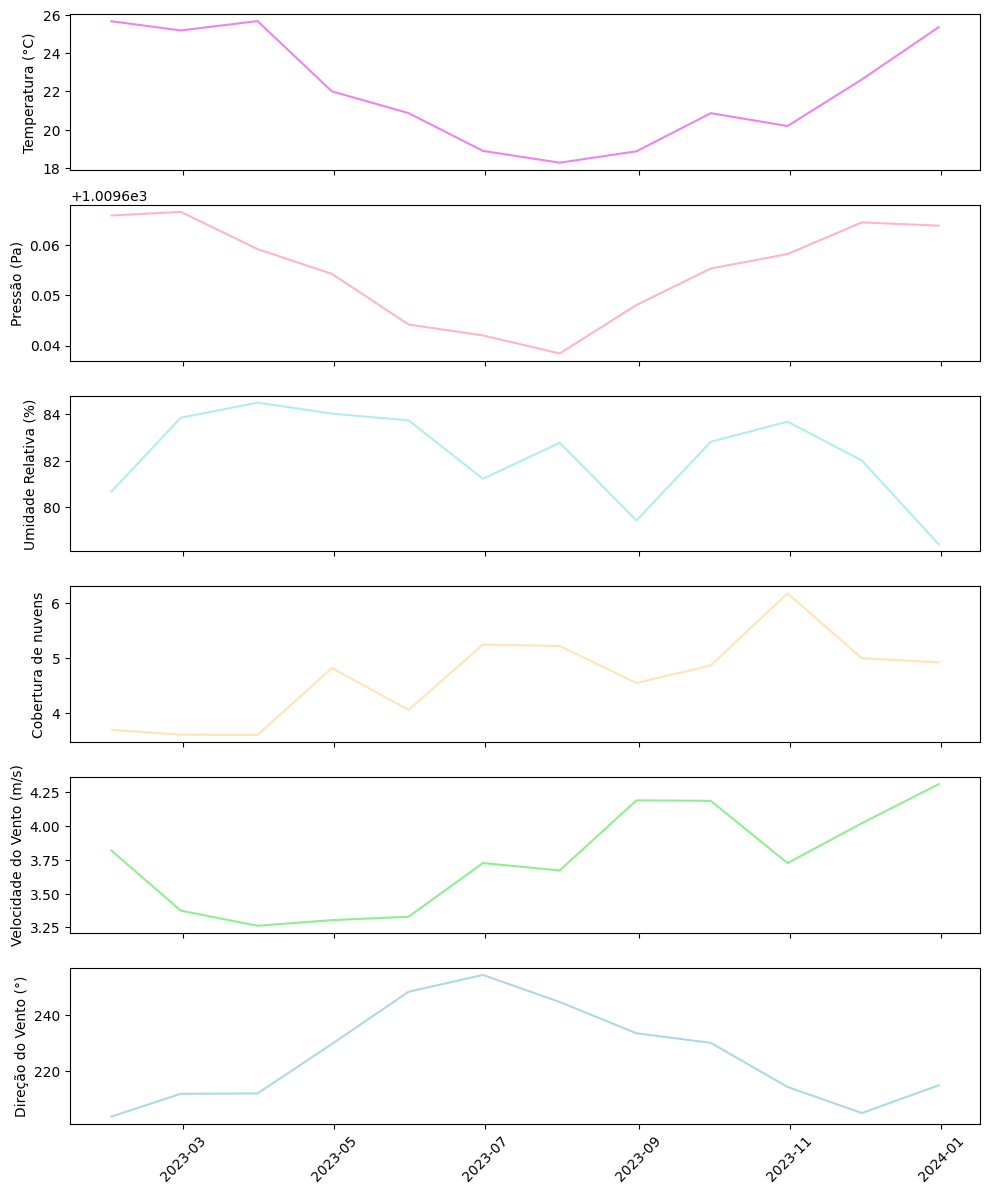

In [29]:

print(metSuperficie)
metSuperficie.set_index('datetime', inplace=True)
media_mensal = metSuperficie.resample('ME').mean()
min_mensal = metSuperficie.resample('ME').min()
max_mensal = metSuperficie.resample('ME').max()

# Plotando figura após fazer a média mensal
fig, ax = plt.subplots(6, sharex=True, figsize=(10, 12))

ax[0].plot(media_mensal.index, media_mensal['temp'], color='violet')
ax[0].set_ylabel('Temperatura (°C)')

ax[1].plot(media_mensal.index, media_mensal['p'], color='lightpink')
ax[1].set_ylabel('Pressão (Pa)')

ax[2].plot(media_mensal.index, media_mensal['relh'], color='paleturquoise')
ax[2].set_ylabel('Umidade Relativa (%)')

ax[3].plot(media_mensal.index, media_mensal['cco'], color='moccasin')
ax[3].set_ylabel('Cobertura de nuvens')

ax[4].plot(media_mensal.index, media_mensal['ws'], color='lightgreen')
ax[4].set_ylabel('Velocidade do Vento (m/s)')

ax[5].plot(media_mensal.index, media_mensal['wd'], color='lightblue')
ax[5].set_ylabel('Direção do Vento (°)')

ax[5].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

rootFolder = os.getcwd()
figFolder = rootFolder.replace('\\','/')+'/figures/'
fig.savefig(figFolder+'Figure3.png') 

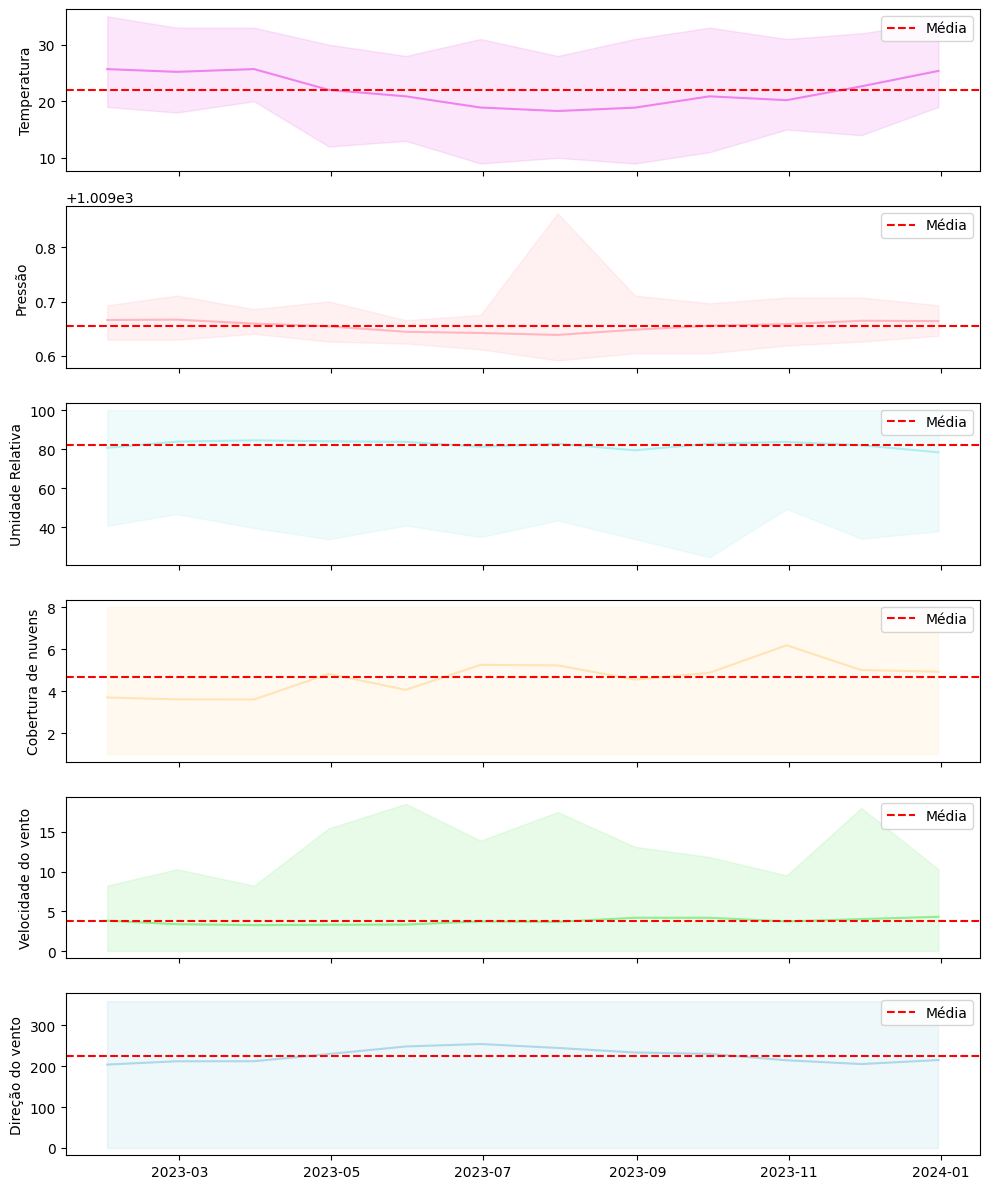

In [30]:
fig, ax = plt.subplots(6, sharex=True, figsize=(10, 12))

# Plot para a temperatura
ax[0].plot(media_mensal.index, media_mensal['temp'], color='violet')
ax[0].fill_between(media_mensal.index, min_mensal['temp'], max_mensal['temp'], color='violet', alpha=0.2)
ax[0].axhline(y=media_mensal['temp'].mean(), color='red', linestyle='--', label='Média')
ax[0].set_ylabel('Temperatura')
ax[0].legend()

# Plot para a pressão
ax[1].plot(media_mensal.index, media_mensal['p'], color='lightpink')
ax[1].fill_between(media_mensal.index, min_mensal['p'], max_mensal['p'], color='lightpink', alpha=0.2)
ax[1].axhline(y=media_mensal['p'].mean(), color='red', linestyle='--', label='Média')
ax[1].set_ylabel('Pressão')
ax[1].legend()

# Plot para a umidade relativa
ax[2].plot(media_mensal.index, media_mensal['relh'], color='paleturquoise')
ax[2].fill_between(media_mensal.index, min_mensal['relh'], max_mensal['relh'], color='paleturquoise', alpha=0.2)
ax[2].axhline(y=media_mensal['relh'].mean(), color='red', linestyle='--', label='Média')
ax[2].set_ylabel('Umidade Relativa')
ax[2].legend()

# Plot para a cobertura de nuvens
ax[3].plot(media_mensal.index, media_mensal['cco'], color='moccasin')
ax[3].fill_between(media_mensal.index, min_mensal['cco'], max_mensal['cco'], color='moccasin', alpha=0.2)
ax[3].axhline(y=media_mensal['cco'].mean(), color='red', linestyle='--', label='Média')
ax[3].tick_params(axis='x', rotation=45)
ax[3].set_ylabel('Cobertura de nuvens')
ax[3].legend()

# Plot para a velocidade do vento
ax[4].plot(media_mensal.index, media_mensal['ws'], color='lightgreen')
ax[4].fill_between(media_mensal.index, min_mensal['ws'], max_mensal['ws'], color='lightgreen', alpha=0.2)
ax[4].axhline(y=media_mensal['ws'].mean(), color='red', linestyle='--', label='Média')
ax[4].set_ylabel('Velocidade do vento')
ax[4].legend()

# Plot para a direção do vento
ax[5].plot(media_mensal.index, media_mensal['wd'], color='lightblue')
ax[5].fill_between(media_mensal.index, min_mensal['wd'], max_mensal['wd'], color='lightblue', alpha=0.2)
ax[5].axhline(y=media_mensal['wd'].mean(), color='red', linestyle='--', label='Média')
ax[5].set_ylabel('Direção do vento')
ax[5].legend()

plt.tight_layout()
plt.show()

rootFolder = os.getcwd()
figFolder = rootFolder.replace('\\','/')+'/figures/'
fig.savefig(figFolder+'Figure4.png') 

Acima é representado em gráfico as médias mensais (linha sólida colorida), a média anual (linha tracejada vermelha) e os dados máximos e mínimos mensais representados em sombra com o pacote https://matplotlib.org/stable/gallery/lines_bars_and_markers/fill_between_demo.html

#### - Análise do vento com a Rosa dos Ventos

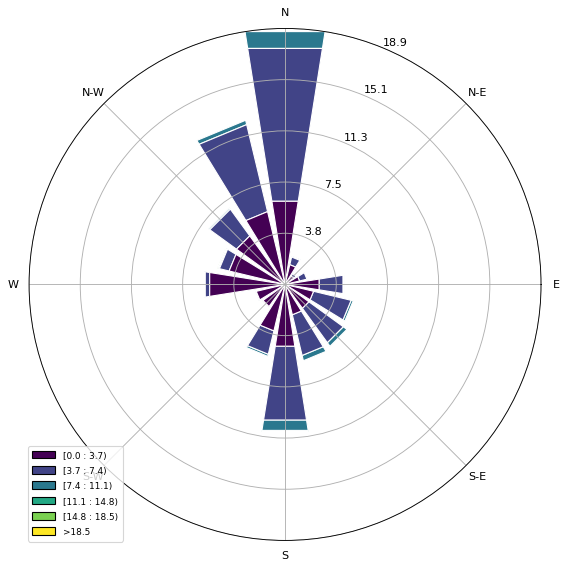

In [31]:
from windrose import WindroseAxes

ax = WindroseAxes.from_ax()
ax.bar(metSuperficie['wd'], metSuperficie['ws'], normed = True, opening = 0.8, edgecolor='white')
ax.set_legend()


Dessa forma, temos que o vento predominante é o Norte, seguido do Sul na região. Dessa forma, deve-se levar em consideração as fontes de poluição: é relevante analisar as fontes de poluição que ficam ao norte e ao sul do ponto de interesse, para entender o que chega a partir do vento. Isso impacta no transporte e dispersão dos poluentes. 

## Etapa 2: Análise do perfil de temperatura

Nesta etapa será feita a análise do perfil de temperatura da estação de monitoramento no aeroporto de Florianópolis utilizando o pacote Siphon do Python, com dados de 0 e 12 horas durante 10 dias, sendo 5 no verão e 5 no inverno. 

Além disso, serão determinados os pontos de inversão e possível altura da camada limite.

Analisando dados para 2024-02-18 00:00:00


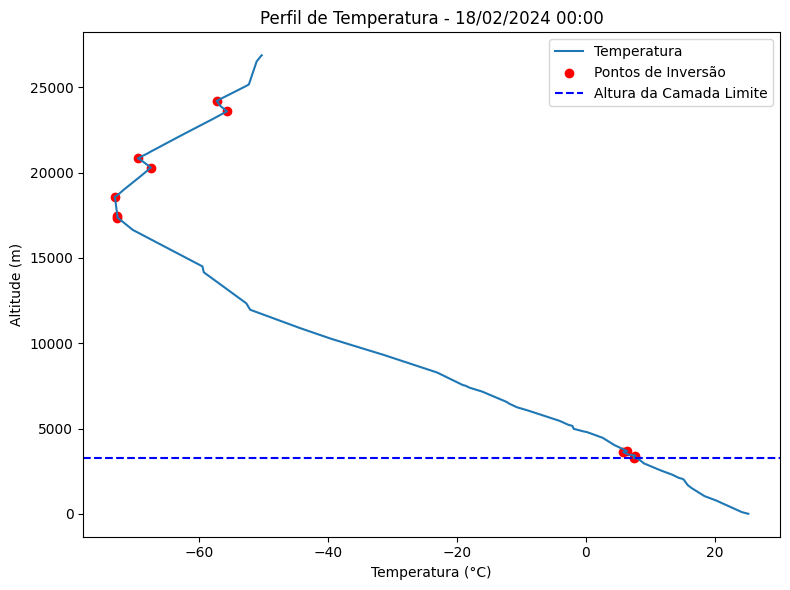

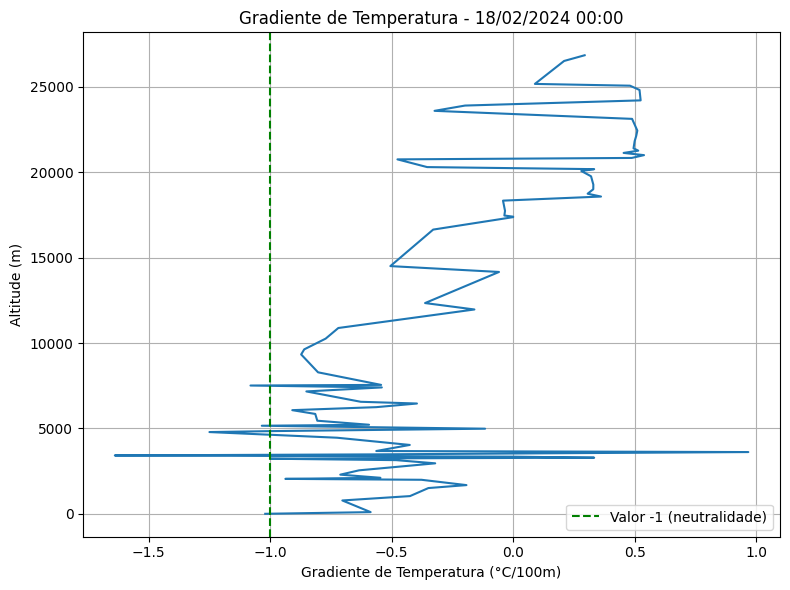

Analisando dados para 2023-12-29 00:00:00


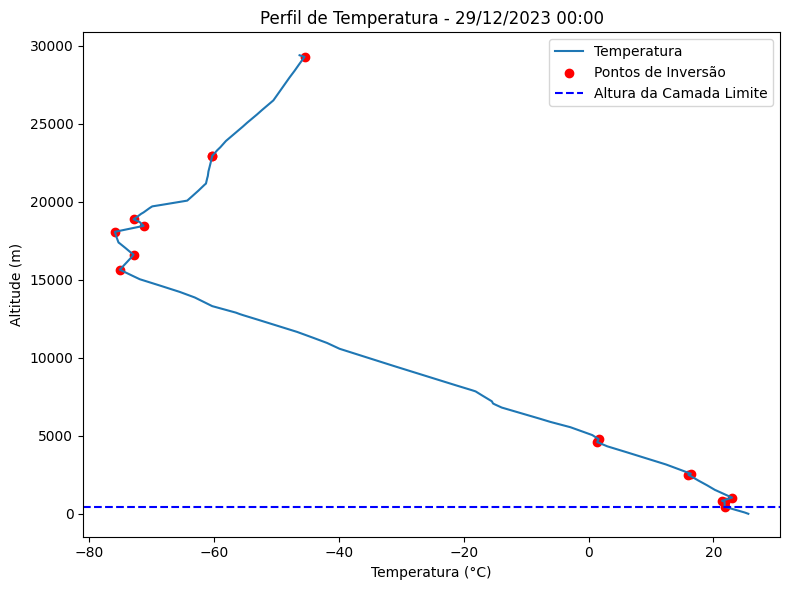

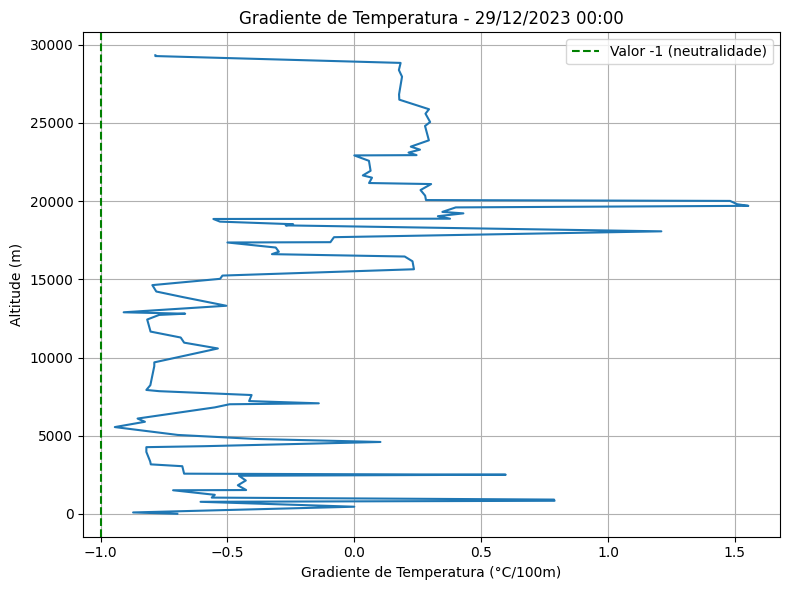

Analisando dados para 2024-01-13 00:00:00


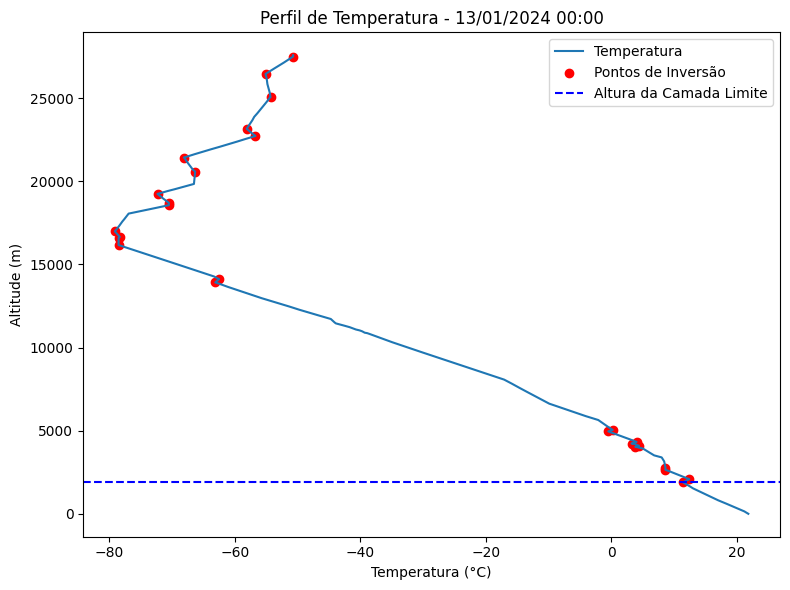

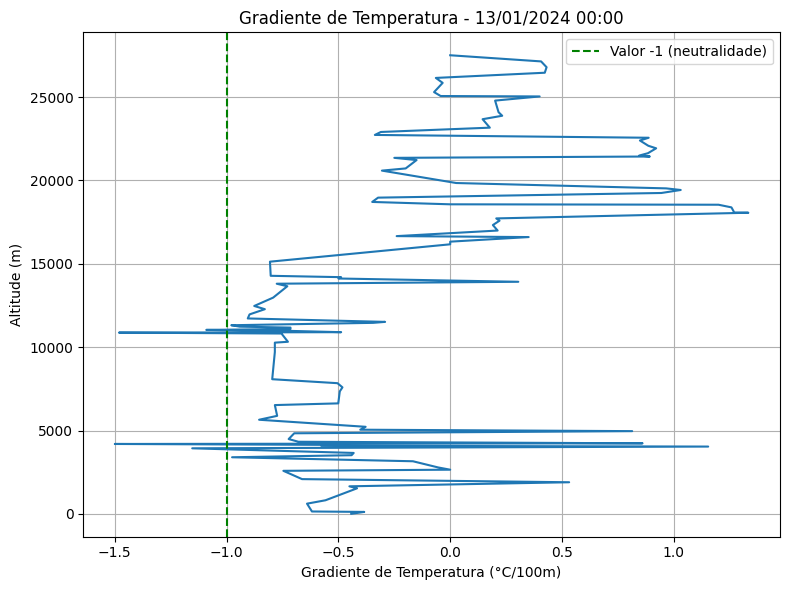

Analisando dados para 2024-01-26 00:00:00


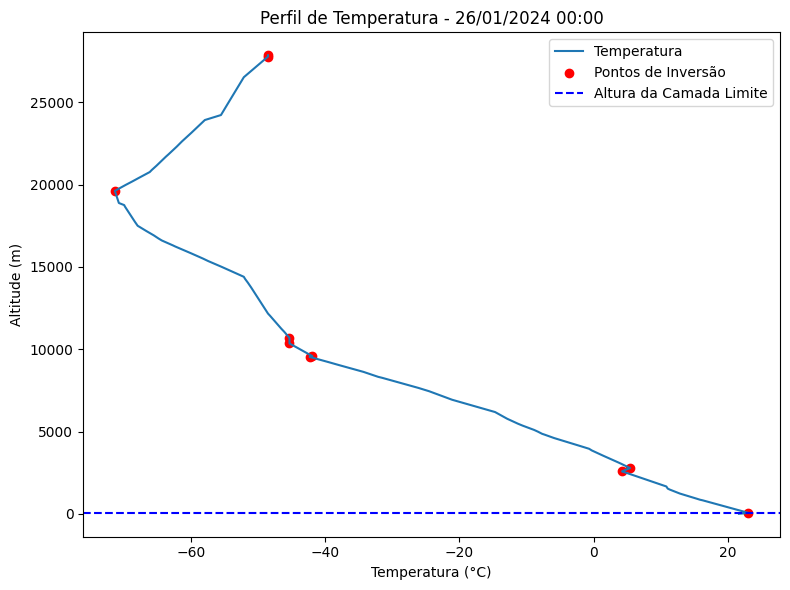

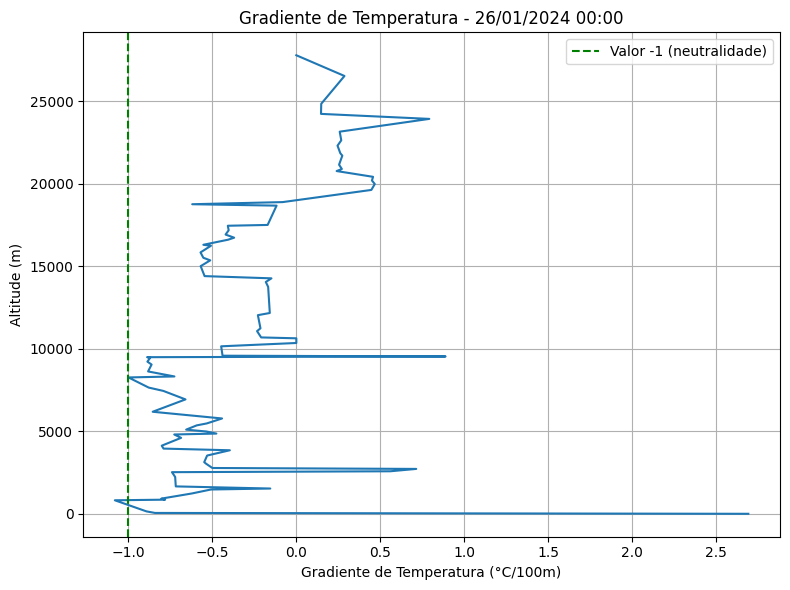

Analisando dados para 2023-12-13 00:00:00


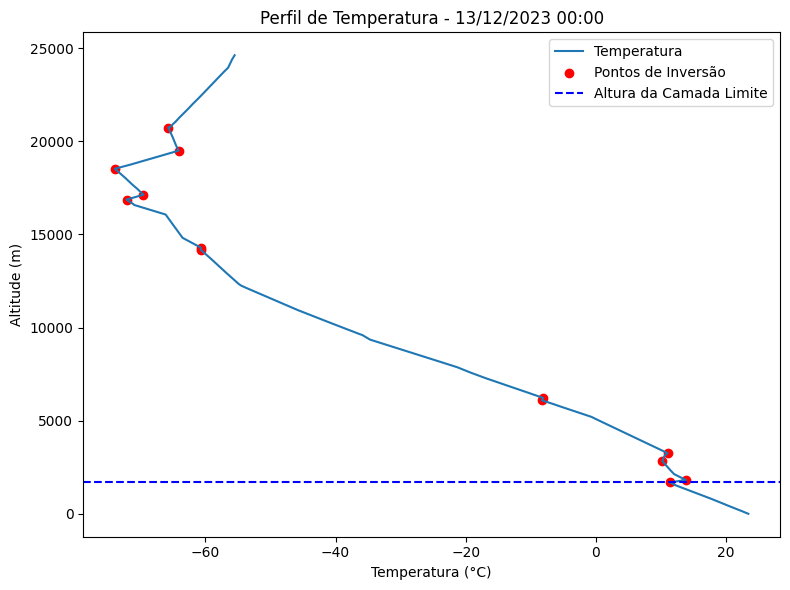

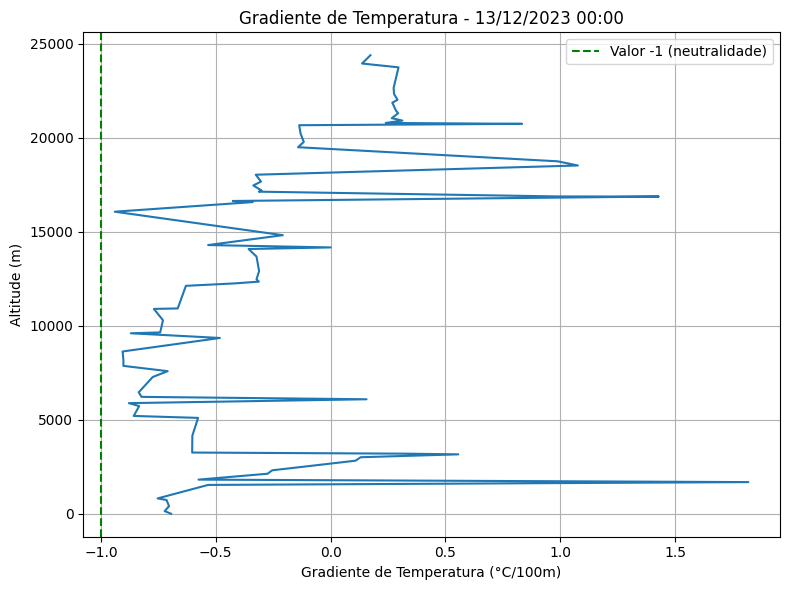

In [32]:
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import numpy as np
from siphon.simplewebservice.wyoming import WyomingUpperAir
import random

# Função para calcular e plotar o perfil de temperatura com pontos de inversão e altura da camada limite
def plot_temperature_profile(date, station):
    try:
        # Extraindo os dados
        df = WyomingUpperAir.request_data(date, station)
        
        # Verificando se as colunas necessárias estão presentes e se os dados não estão vazios
        if df.empty or 'temperature' not in df.columns or 'height' not in df.columns:
            print(f"Dados de temperatura ou altura não encontrados para a data {date}")
            return
        
        # Encontrando pontos de inversão
        temp = df['temperature'].values
        alt = df['height'].values
        
        if len(temp) < 3 or len(alt) < 3:  # Verificar se há dados suficientes para calcular inversões
            print(f"Dados insuficientes para a data {date}")
            return
        
        pontos_inversao = np.where(np.diff(np.sign(np.diff(temp))) != 0)[0] + 1
        
        # Calculando a altura da camada limite
        altura_camada_limite = alt[pontos_inversao[0]] if len(pontos_inversao) > 0 else None
        
        # Fazendo figura do perfil de temperatura com pontos de inversão e altura da camada limite
        fig, ax = plt.subplots(figsize=(8, 6))
        
        # Perfil de temperatura com pontos de inversão e altura da camada limite
        ax.plot(temp, alt, label='Temperatura')
        if len(pontos_inversao) > 0:
            ax.scatter(temp[pontos_inversao], alt[pontos_inversao], color='red', label='Pontos de Inversão')
        if altura_camada_limite:
            ax.axhline(y=altura_camada_limite, color='blue', linestyle='--', label='Altura da Camada Limite')
        ax.set_xlabel('Temperatura (°C)')
        ax.set_ylabel('Altitude (m)')
        ax.set_title(f'Perfil de Temperatura - {date.strftime("%d/%m/%Y %H:%M")}')
        ax.legend()

        plt.tight_layout()
        plt.show()
    
    except Exception as e:
        print(f"Erro ao obter ou processar dados para a data {date}: {e}")

# Função para calcular e plotar o gradiente de temperatura
def plot_temperature_gradient(date, station):
    try:
        # Extraindo os dados
        df = WyomingUpperAir.request_data(date, station)
        
        # Verificando se as colunas necessárias estão presentes e se os dados não estão vazios
        if df.empty or 'temperature' not in df.columns or 'height' not in df.columns:
            print(f"Dados de temperatura ou altura não encontrados para a data {date}")
            return
        
        # Calculando o gradiente de temperatura
        deltaT = np.diff(df['temperature'])
        deltaZ = np.diff(df['height'])
        dTdZ = (deltaT / deltaZ) * 100

        # Fazendo figura do gradiente de temperatura
        plt.figure(figsize=(8, 6))
        plt.plot(dTdZ, df['height'][:-1])
        plt.axvline(x=-1, color='green', linestyle='--', label='Valor -1 (neutralidade)')
        plt.xlabel('Gradiente de Temperatura (°C/100m)')
        plt.ylabel('Altitude (m)')
        plt.title(f'Gradiente de Temperatura - {date.strftime("%d/%m/%Y %H:%M")}')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()
    
    except Exception as e:
        print(f"Erro ao obter ou processar dados para a data {date}: {e}")

# Função para gerar dias aleatórios dentro de um intervalo específico e verificar a disponibilidade de dados
def generate_random_days_with_data(start_date, end_date, num_days, station):
    available_days = []
    while len(available_days) < num_days:
        random_day = start_date + timedelta(days=random.randint(0, (end_date - start_date).days))
        try:
            df = WyomingUpperAir.request_data(random_day, station)
            if not df.empty and 'temperature' in df.columns and 'height' in df.columns:
                available_days.append(random_day)
        except:
            continue
    return available_days

# Data inicial para análise no verão do hemisfério sul (dezembro, janeiro, fevereiro)
start_date = datetime(2023, 12, 1)
end_date = datetime(2024, 2, 29)  # Vamos considerar fevereiro bissexto

# Local da análise
station = 'SBFL'

# Selecionar 5 dias aleatórios dentro do intervalo especificado com dados disponíveis
random_days_with_data = generate_random_days_with_data(start_date, end_date, 5, station)

# Gerar gráficos para os dias selecionados aleatórios com dados disponíveis
for date in random_days_with_data:
    print(f"Analisando dados para {date}")
    plot_temperature_profile(date, station)
    plot_temperature_gradient(date, station)

Dessa forma, temos os dados do VERÃO

#### - Análise do Perfil de Temperatura para os meses de INVERNO

Analisando dados para 2023-08-06 00:00:00


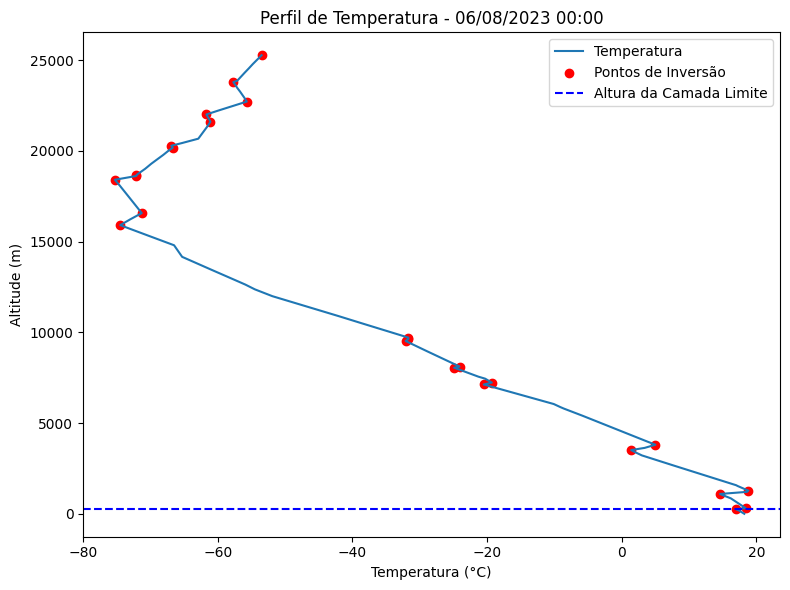

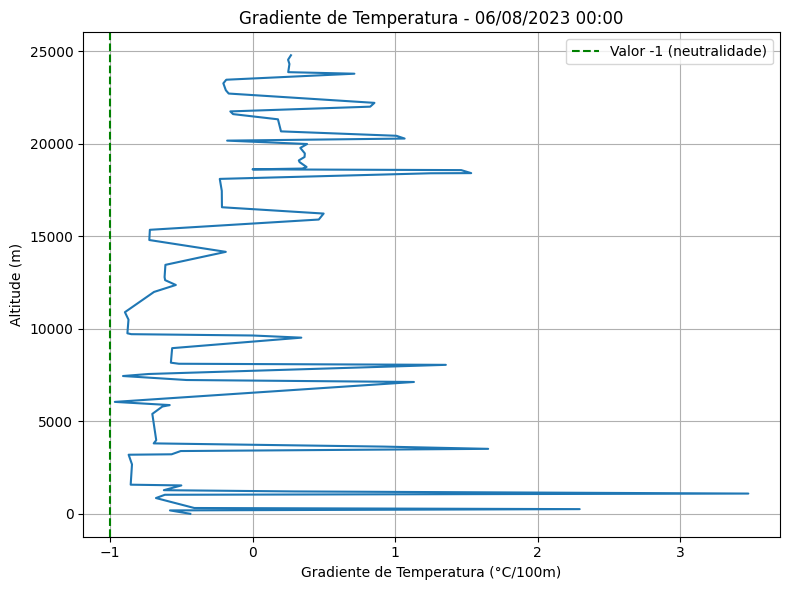

Analisando dados para 2023-06-29 00:00:00


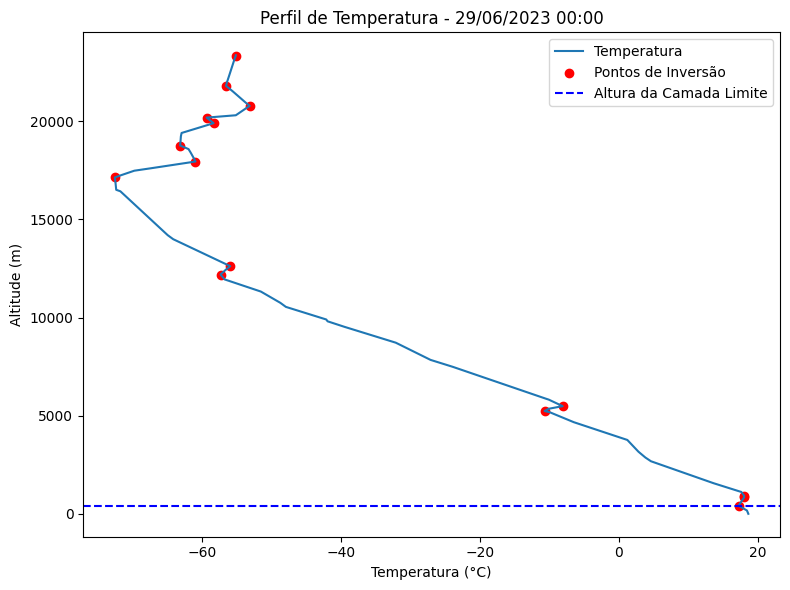

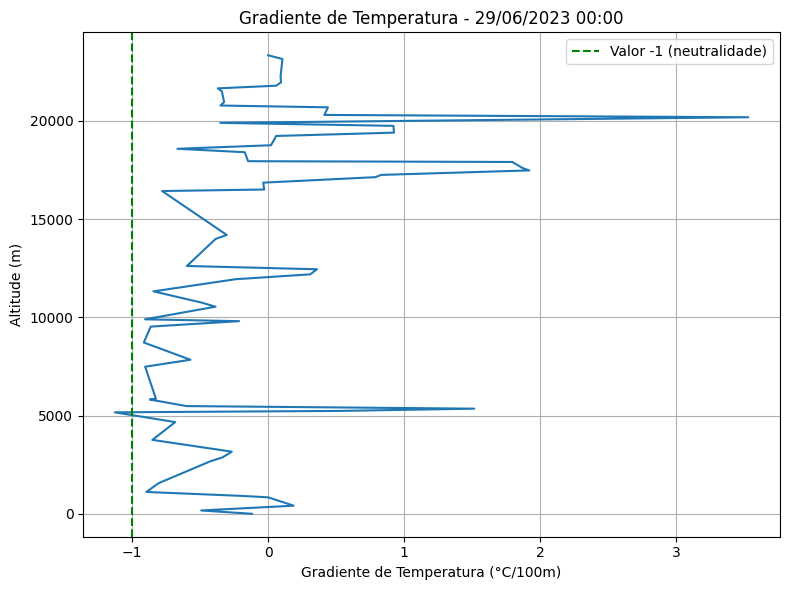

Analisando dados para 2023-06-01 00:00:00


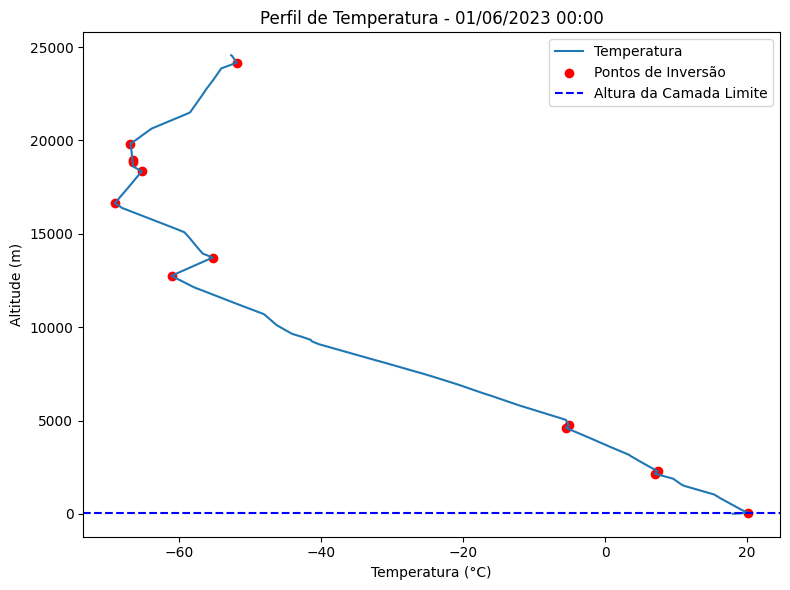

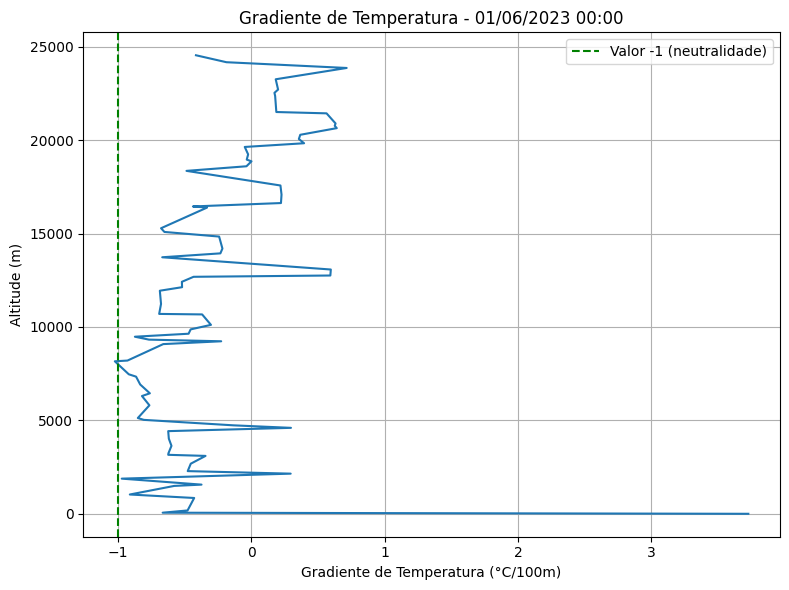

Analisando dados para 2023-08-04 00:00:00


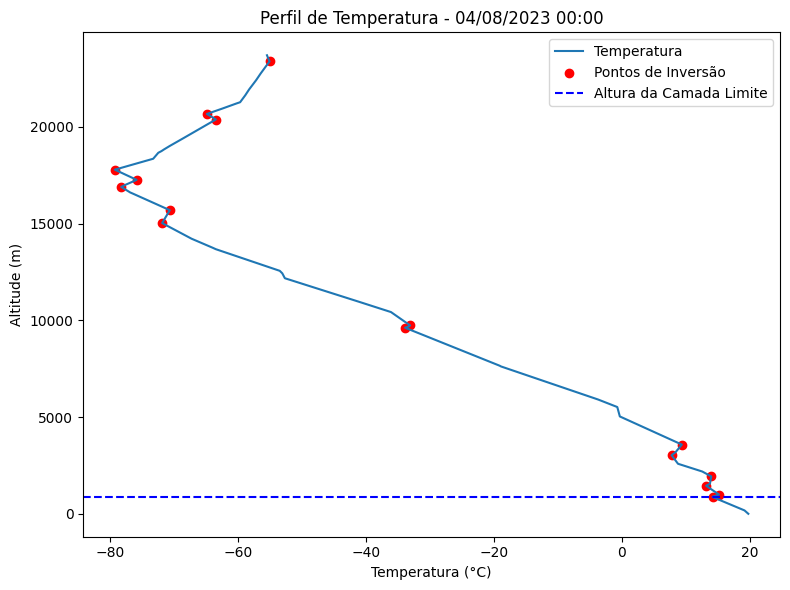

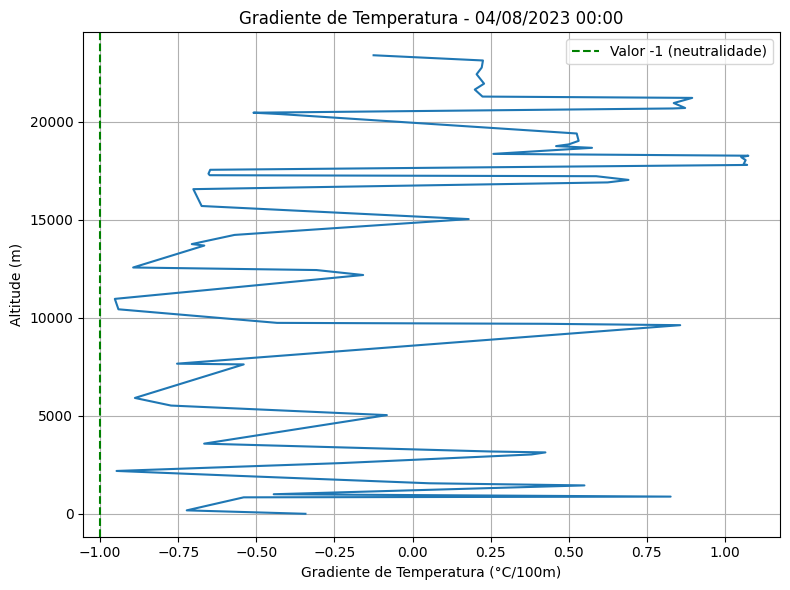

Analisando dados para 2023-07-20 00:00:00


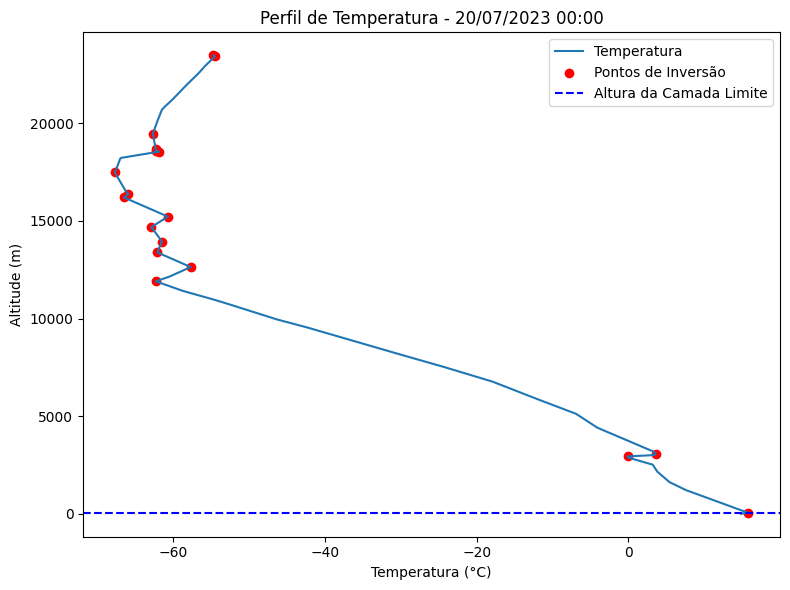

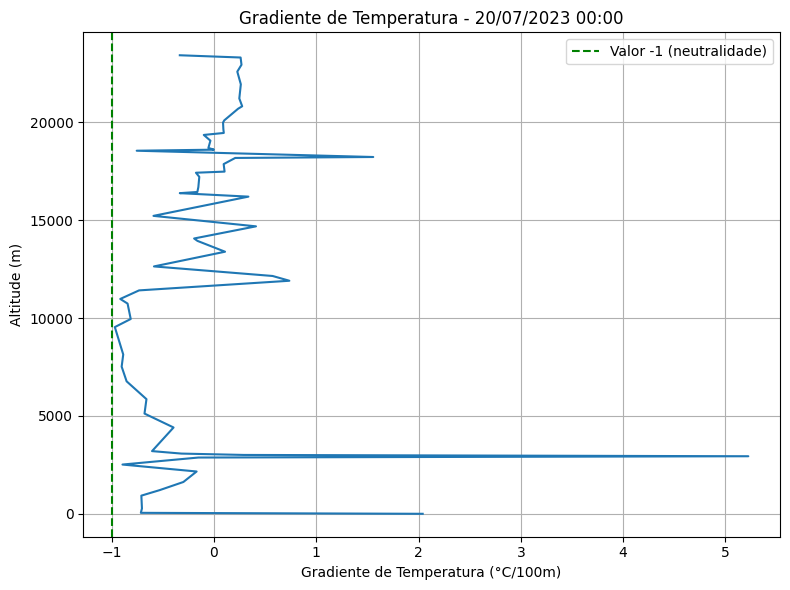

In [33]:
# Função para calcular e plotar o perfil de temperatura com pontos de inversão e altura da camada limite
def plot_temperature_profile(date, station):
    try:
        # Extraindo os dados
        df = WyomingUpperAir.request_data(date, station)
        
        # Verificando se as colunas necessárias estão presentes e se os dados não estão vazios
        if df.empty or 'temperature' not in df.columns or 'height' not in df.columns:
            print(f"Dados de temperatura ou altura não encontrados para a data {date}")
            return
        
        # Encontrando pontos de inversão
        temp = df['temperature'].values
        alt = df['height'].values
        
        if len(temp) < 3 or len(alt) < 3:  # Verificar se há dados suficientes para calcular inversões
            print(f"Dados insuficientes para a data {date}")
            return
        
        pontos_inversao = np.where(np.diff(np.sign(np.diff(temp))) != 0)[0] + 1
        
        # Calculando a altura da camada limite
        altura_camada_limite = alt[pontos_inversao[0]] if len(pontos_inversao) > 0 else None
        
        # Fazendo figura do perfil de temperatura com pontos de inversão e altura da camada limite
        fig, ax = plt.subplots(figsize=(8, 6))
        
        # Perfil de temperatura com pontos de inversão e altura da camada limite
        ax.plot(temp, alt, label='Temperatura')
        ax.scatter(temp[pontos_inversao], alt[pontos_inversao], color='red', label='Pontos de Inversão')
        if altura_camada_limite:
            ax.axhline(y=altura_camada_limite, color='blue', linestyle='--', label='Altura da Camada Limite')
        ax.set_xlabel('Temperatura (°C)')
        ax.set_ylabel('Altitude (m)')
        ax.set_title(f'Perfil de Temperatura - {date.strftime("%d/%m/%Y %H:%M")}')
        ax.legend()

        plt.tight_layout()
        plt.show()
    
    except Exception as e:
        print(f"Erro ao obter ou processar dados para a data {date}: {e}")

# Função para calcular e plotar o gradiente de temperatura
def plot_temperature_gradient(date, station):
    try:
        # Extraindo os dados
        df = WyomingUpperAir.request_data(date, station)
        
        # Verificando se as colunas necessárias estão presentes e se os dados não estão vazios
        if df.empty or 'temperature' not in df.columns or 'height' not in df.columns:
            print(f"Dados de temperatura ou altura não encontrados para a data {date}")
            return
        
        # Calculando o gradiente de temperatura
        deltaT = np.diff(df['temperature'])
        deltaZ = np.diff(df['height'])
        dTdZ = (deltaT / deltaZ) * 100

        # Fazendo figura do gradiente de temperatura
        plt.figure(figsize=(8, 6))
        plt.plot(dTdZ, df['height'][:-1])
        plt.axvline(x=-1, color='green', linestyle='--', label='Valor -1 (neutralidade)')
        plt.xlabel('Gradiente de Temperatura (°C/100m)')
        plt.ylabel('Altitude (m)')
        plt.title(f'Gradiente de Temperatura - {date.strftime("%d/%m/%Y %H:%M")}')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()
    
    except Exception as e:
        print(f"Erro ao obter ou processar dados para a data {date}: {e}")

# Função para gerar dias aleatórios dentro de um intervalo específico
def generate_random_days(start_date, end_date, num_days):
    total_days = (end_date - start_date).days
    random_days = random.sample(range(total_days), num_days)
    return [start_date + timedelta(days=day_offset) for day_offset in random_days]

# Data inicial para análise no verão do hemisfério sul (dezembro, janeiro, fevereiro)
start_date_inverno = datetime(2023, 6, 1)
end_date_inverno = datetime(2023, 8, 31)  # Vamos considerar fevereiro bissexto

# Local da análise
station = 'SBFL'

# Selecionar 5 dias aleatórios dentro do intervalo especificado
random_days = generate_random_days(start_date_inverno, end_date_inverno, 5)

# Gerar gráficos para os dias selecionados aleatórios
for date in random_days:
    print(f"Analisando dados para {date}")
    plot_temperature_profile(date, station)
    plot_temperature_gradient(date, station)
            

Assim, temos os dados de INVERNO para os meses de junho, julho e agosto.

## Etapa 3: Execução do EZ-AERMET para avaliar a altura da camada limite e turbulência para os dados

Nesta etapa serão utilizados os dados de superfície e sondagem para executar o software. Serão feitas figuras para analisar as condições meteorológicas e dua potencial influência na qualidade do ar.

Também será analisado a superfície do local de estudo utilizando o output da plataforma EZ-AERMET, verificação dos valores de albedo, razão de Bowen e rugosidade para cada quadrante do vento.

In [34]:
rootPath = os.getcwd()
print(rootPath) #mostra a pasta/diretório que estou no momento

ezAermetPath = rootPath + '\\inputs\\ezAermet'
print(ezAermetPath) 

#Listando os arquivos dentro do diretório
files = os.listdir(ezAermetPath)
print(files)

C:\Users\Acer\Desktop\ENS5173_Barbara\ENS5173_Barbara
C:\Users\Acer\Desktop\ENS5173_Barbara\ENS5173_Barbara\inputs\ezAermet
['METEO.csv']


In [37]:
ezAermet=[]
for file in files:
    ezAermet.append(pd.read_csv(ezAermetPath+'\\'+file))

ezAermet = pd.concat(ezAermet)

print(ezAermet)

      year  month  day  Julian day  hour  sensible heat flux (W/m2)  \
0       23      1    1           1     1                      -50.0   
1       23      1    1           1     2                      -47.7   
2       23      1    1           1     3                      -54.4   
3       23      1    1           1     4                      -61.1   
4       23      1    1           1     5                      -25.3   
...    ...    ...  ...         ...   ...                        ...   
8755    23     12   31         365    20                      -43.5   
8756    23     12   31         365    21                      -13.9   
8757    23     12   31         365    22                      -11.4   
8758    23     12   31         365    23                     -999.0   
8759    23     12   31         365    24                     -999.0   

      surface friction velocity (m/s)  \
0                               0.571   
1                               0.545   
2                       

In [39]:
# Caminho para o arquivo CSV
caminho = r'C:\Users\Acer\Desktop\ENS5173_Barbara\ENS5173_Barbara\inputs\ezAermet\METEO.csv'

# Abrir o arquivo CSV como um DataFrame do pandas, especificando o encoding
df = pd.read_csv(caminho)

# Configurações para exibir todas as colunas
pd.set_option('display.max_columns', None)

# Exibir DataFrame
display(df)

,year,month,day,Julian day,hour,sensible heat flux (W/m2),surface friction velocity (m/s),convective velocity scale (set to -9.0 for stable atmosphere) (m/s),potential temperature gradient above the mixing height (K/m),mixing_height,mechanically-driven mixing height (computed for all hours) (m),Monin-Obukhov,roughness,Bowen ratio (month and wind direction dependent) (non-dimensional) 15 albedo (month and wind direction dependent; 1.0 for hours before sunrise or after sunset) (non-dimensional),albedo (month and wind direction dependent; 1.0 for hours before sunrise\nor after sunset) (non-dimensional),"wind speed, wind direction, and anemometer height that were used in the computations in Stage 3 (m/s degrees, m)","wind speed, wind direction, and anemometer height that were used in the computations in Stage 3 (m/s degrees, m).1","wind speed, wind direction, and anemometer height that were used in the computations in Stage 3 (m/s degrees, m).2",temperature and measurement height that were used in the computations in Stage 3 (K and m),temperature and measurement height that were used in the computations in Stage 3 (K and m).1,precipitation type code,precipitation amount (mm/hr),relative humidity (%),station pressure (mb),cloud cover (tenths),wind speed adjustment and data source flag,cloud cover and temperature substitution by interpolation
0,23,1,1,1,1,-50.0,0.571,-9.0,-9.0,-999,1036,336.1,0.9767,0.45,1.0,4.1,1,14,298.1,2,0,0,83,1010,6,NAD-SFC,NoSubs
1,23,1,1,1,2,-47.7,0.545,-9.0,-9.0,-999,967,305.8,0.8680,0.45,1.0,4.1,358,14,298.1,2,0,0,83,1010,6,NAD-SFC,NoSubs
2,23,1,1,1,3,-54.4,0.622,-9.0,-9.0,-999,1177,399.0,0.8680,0.45,1.0,4.6,354,14,298.1,2,0,0,83,1010,6,NAD-SFC,NoSubs
3,23,1,1,1,4,-61.1,0.699,-9.0,-9.0,-999,1398,502.7,0.8680,0.45,1.0,5.1,343,14,298.1,2,0,0,83,1010,6,NAD-SFC,NoSubs
4,23,1,1,1,5,-25.3,0.290,-9.0,-9.0,-999,605,86.4,0.8680,0.45,1.0,2.6,333,14,298.1,2,0,0,89,1010,6,NAD-SFC,NoSubs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,23,12,31,365,20,-43.5,0.496,-9.0,-9.0,-999,893,252.5,1.0130,0.45,1.0,3.6,127,14,297.1,2,0,0,69,1010,6,NAD-SFC,NoSubs
8756,23,12,31,365,21,-13.9,0.160,-9.0,-9.0,-999,357,26.5,1.0130,0.45,1.0,2.1,119,14,297.1,2,0,0,69,1010,6,NAD-SFC,NoSubs
8757,23,12,31,365,22,-11.4,0.140,-9.0,-9.0,-999,140,21.6,0.6982,0.45,1.0,2.1,192,14,296.1,2,0,0,78,1010,6,NAD-SFC,NoSubs
8758,23,12,31,365,23,-999.0,-9.000,-9.0,-9.0,-999,-999,-99999.0,0.8099,0.45,1.0,999.0,999,-9,296.1,2,9999,-9,999,915,6,NAD,Sub_CC-TT
